# Project 2: Solving quantum systems numerically

## Part 1: Quadrature Rules

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Probability Density')

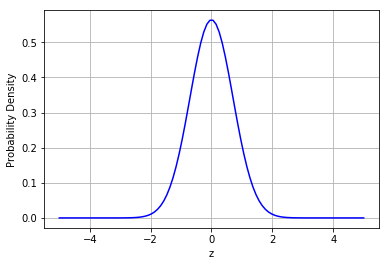

In [19]:
#defining our wavefunction and plotting it looks like a good start#
#actually what is usefull here the wavefunction squared:

def psi_squared(z):
    return (1 / np.sqrt(np.pi)) * np.exp(-(z*z))

#create some z-space
zspace = np.linspace(-5,5,100)

#plot

plt.plot(zspace,psi_squared(zspace),color = "blue",label = "Single Particle Wavefunction")
plt.grid()
plt.xlabel("z")
plt.ylabel("Probability Density")
#plt.legend(loc = "lower right")

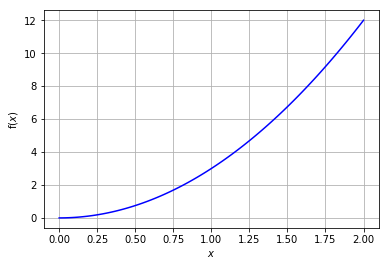

In [20]:
#I will try ti implement the extended trapezium rule
#this is not as straight forward as it first seemed
#I will define a simple function (of which I know the integral) to integrate over

def curve(x):
    return 3 * x * x

#get some plotting space
xspace = np.linspace(0,2,100)

plt.plot(xspace,curve(xspace), color = "blue")
plt.xlabel("$x$")
plt.ylabel("f$(x)$")
plt.grid()
plt.show()

In [21]:
#it simple to see that the integral of the above is X^3 and therefore for 0 to 2 it equals 8

def trap_integrate(f,a,b,epsilon):
    
    '''
    This function numerically integrates a function f in[a,b] with a relative accuracy of epsilon
    using the extended trapezium rule.
    This function returns an array of the form [Integral,error,Number of Function Evaluations,epsilon]
    '''
    
    h = b - a
    #print(h)
    I = h * (f(a) + f(b)) / 2 #this is the inital guess of the integral
    #print (I)
    accuracy = np.inf
    h /= 2
    N = 1 #this is the number of samples we are going to get in every itteration ; 
    c = 2  
    while accuracy > epsilon:
        
        S = 0
        for i in range(0,N):
            #print ("i is =",i)
            c +=1 #different way of counting
            S += f(a+h+ i*(2*h)) #we move between the gaps to sample the midpoints, 
                                    #of the points that have been sampled before. 
    
        Inew = I/2 + h*S
        accuracy = np.abs((I - Inew) / I)
        I = Inew        
        N *= 2
        h /= 2
        
        error = I * accuracy
        
        #To get the total number of function evalations we need to sum all the values of N
        # of course since these are powers of 2 then 1 + 2 + 4 + ... N/2 + N is equalt to 2N-1 
    print ("The integral of the function from " + str(a) + " to " + str(b) + " is " +str(I) +" +- " + str(error))
    print ("The number of function evaluations required was " + str(N+1))
    print (c) # see is more reliable I think
    
    return[I,error,(N+1),epsilon]

#trap_integrate(curve,0,2,1E-6)

In [22]:
#now it's time to check the routine on the wavefunction:
a = 0
b = 2
e = 1E-13
trap_integrate(psi_squared,a,b,e)

The integral of the function from 0 to 2 is 0.4976611325094576 +- 3.391731340230085e-14
The number of function evaluations required was 1048577
1048577


[0.4976611325094576, 3.391731340230085e-14, 1048577, 1e-13]

In [23]:
#a way to verify this is to ensure that it gives a value of 1 (since the wavefunction is normalised) 
a = -10
b = 10
e = 1E-3
trap_integrate(psi_squared,a,b,e)
#yes the integral is one in with the current machine accuracy
#python uses doble prescision floats so I think this is good enough
#also no the low relative accuracy we need to achieve this

The integral of the function from -10 to 10 is 1.0 +- 2.128430764924078e-11
The number of function evaluations required was 65
65


[1.0, 2.128430764924078e-11, 65, 0.001]

In [24]:
#let's do the same for Simpson's rule
#I think that that best way is to base it on the previous algorythm

In [25]:
def sim_integrate(f,a,b,epsilon):
    
    '''
    This function numerically integrates a function f in [a,b] with a relative accuracy of epsilon
    using Simpson's rule (as related to the extended trapezium rule).
    This function returns an array of the form [Integral,error,Number of Function Evaluations,epsilon]
    '''    
    
    h = b - a
    #print(h)
    I = h * (f(a) + f(b)) / 2 #this is the inital guess of the integral
    #print (I)
    accuracy = np.inf
    h /= 2
    N = 1 #this is the number of samples we are going to get in every itteration ;     
    c = 2
    Simpson = I
    while accuracy > epsilon:
        
        S = 0
        for i in range(0,N):
            #print ("i is =",i) 
            c += 1
            S += f(a+h+ i*(2*h)) #we move between the gaps to sample the midpoints of the points that have been sampled before. 
    
        Inew = I/2 + h*S    
        Simpson_new = (4/3) * Inew - (1/3)*I  #estimated of the integral using Simpson's rule expressed in results of the 
                                                #trapezium rule
        accuracy = np.abs((Simpson - Simpson_new) / Simpson)
        
        Simpson = Simpson_new      #note tha the two values of the "Simpson" variable  are note stored becuase they are needed
                                    #for the evaluation of the integral. This is done purely for evaluating the accuracy
        I = Inew        
        N *= 2
        h /= 2
        
        #what about the error on our estimate of the integral?
        error = Simpson * accuracy
        
        #To get the total number of function evalations we need to sum all the values of N
        # of course since these are powers of 2 then 1 + 2 + 4 + ... N/2 + N is equalt to 2N-1 
    print ("The integral of the function from " + str(a) + " to " + str(b) + " is " +str(Simpson) +" +- " + str(error))
    print ("The number of function evaluations required was " + str(N + 1))
    print (c) 
    return [Simpson,error,(N+1),epsilon]

#sim_integrate(curve,0,2,1E-6)

In [26]:
#Simpson's rule seems to be amazingly fast!
#let's see what it does for the wavefunction
sim_integrate(psi_squared,0,2,1E-10)

The integral of the function from 0 to 2 is 0.4976611325089415 +- 8.019751529660287e-12
The number of function evaluations required was 513
513


[0.4976611325089415, 8.019751529660287e-12, 513, 1e-10]

In [27]:
#Also turns out that this paricular integral is given by the error function. We can therefore use this to validate our results
from scipy.special import erf
erf(2)/2 - 0.49766113250947575

6.106226635438361e-16

In [28]:
#I will try to automate the evaluation of the two rules
#hold data in an array = [integral,error,function evaliations, epsilon]
data = [] #make a list to hold the data
for exponent in range(6,14,1): #iterate for different values of relative accuracy evaluating the Simpson rule every time
    print(exponent)
    epsilon = 1 * 10 ** (-exponent)
    data.append(sim_integrate(psi_squared,0,2,epsilon))
data #the output below can be copied and pasted to a new notebook for analysis

6
The integral of the function from 0 to 2 is 0.49766113031942405 +- 3.285518696408377e-08
The number of function evaluations required was 65
65
7
The integral of the function from 0 to 2 is 0.49766113031942405 +- 3.285518696408377e-08
The number of function evaluations required was 65
65
8
The integral of the function from 0 to 2 is 0.49766113237260284 +- 2.0531788021191236e-09
The number of function evaluations required was 129
129
9
The integral of the function from 0 to 2 is 0.49766113250092175 +- 1.2831891108544706e-10
The number of function evaluations required was 257
257
10
The integral of the function from 0 to 2 is 0.4976611325089415 +- 8.019751529660287e-12
The number of function evaluations required was 513
513
11
The integral of the function from 0 to 2 is 0.4976611325094434 +- 5.018763182823081e-13
The number of function evaluations required was 1025
1025
12
The integral of the function from 0 to 2 is 0.49766113250947425 +- 3.0864200084581264e-14
The number of function ev

[[0.49766113031942405, 3.285518696408377e-08, 65, 1e-06],
 [0.49766113031942405, 3.285518696408377e-08, 65, 1e-07],
 [0.49766113237260284, 2.0531788021191236e-09, 129, 1e-08],
 [0.49766113250092175, 1.2831891108544706e-10, 257, 1e-09],
 [0.4976611325089415, 8.019751529660287e-12, 513, 1e-10],
 [0.4976611325094434, 5.018763182823081e-13, 1025, 1e-11],
 [0.49766113250947425, 3.0864200084581264e-14, 2049, 1e-12],
 [0.49766113250947425, 3.0864200084581264e-14, 2049, 1e-13]]